In [78]:
#  core
import pandas as pd
import numpy as np
import joblib
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# preprocessing
from sklearn.preprocessing import MinMaxScaler
# modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
# evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Data Analysis Pepeline:
1. Data Exploration
2. Data Cleaning
3. EDA (Visualisation)
4. Feature Engineering
5. Feature Selection
6. Data Preprocessing (Scaling & Encoding)
7. Modeling
8. Model Evaluation & Optimization
9. Deployment & Interpretation

# **STEP 1: Data Exploration**

## **Column Descriptions**

> Id: A unique identifier assigned to each employee record.

> EmployeeName: The full name of the employee. May include first and last names or variations.

> JobTitle: The title or position held by the employee (e.g., "Police Officer", "Clerk", "Nurse").

> BasePay: The basic salary paid to the employee, excluding bonuses and overtime.

> OvertimePay: The compensation received for overtime work, i.e., hours worked beyond the regular schedule.

> OtherPay: Any other additional payments made to the employee, such as bonuses, allowances, or one-time payments.

> Benefits: The monetary value of benefits (e.g., insurance, pensions). Sometimes missing or included in TotalPayBenefits.

> TotalPay: The sum of BasePay, OvertimePay, and OtherPay.

> TotalPayBenefits: The total compensation including salary, additional pay, and benefits.
- TotalPayBenefits = TotalPay + Benefits

> Year: The year the salary record corresponds to.

> Notes: A text field that sometimes includes remarks or notes about the employee or record. Often empty.

> Agency: The department or agency under which the employee works (e.g., "San Francisco").

> Status: Employment status
- FT: Full-Time
- PT: Part-Time
- Unknown or missing in some cases

## **Descriptive Statistics**

> Descriptive statistics summarize and describe the key features of a dataset.

In [67]:
# load the dataset
df = pd.read_csv("C:/Users/ARZ/Desktop/salaries_prediction/salaries.csv")

In [68]:
def dataset_snapshot(df):
    head = df.head(3)
    tail = df.tail(3)
    sample = df.sample(3)
    return pd.concat([head, tail, sample])

dataset_snapshot(df)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT
130958,130959,Daren A Murphy,Gardener,60299.86,3289.38,2576.15,29370.12,66165.39,95535.51,2014,NaN,San Francisco,FT
145402,145403,Garfield George,Recreation Leader,6017.29,0.00,67.30,0.00,6084.59,6084.59,2014,NaN,San Francisco,PT
128934,128935,Leonilyn D Kovacic,Sr Payroll & Personnel Clerk,73471.04,0.0,0.0,29920.02,73471.04,103391.06,2014,NaN,San Francisco,FT


In [5]:
def quick_overview(df):
    return pd.DataFrame({
        "dtype": df.dtypes,
        "nunique": df.nunique(),
        "missing": df.isnull().sum()
    }).reset_index().rename(columns={"index": "column"})
quick_overview(df)

Rows: 148654, Columns: 13


In [6]:
def check_df(df, target=None, head=3):
    pd.set_option("display.max_columns", None)
    pd.set_option("display.width", 500)

    print("#################### SHAPE ########################")
    print(f"🔹 Rows: {df.shape[0]} | 🔹 Columns: {df.shape[1]}\n")
    
    print("#################### INFO #########################")
    print(df.info(), "\n")
 
    print("################## DESCRIPTIVE STATS (numerical) ##################")
    display(df.describe().T.style.background_gradient(cmap='PuBu'))
    
    print("################## DESCRIPTIVE STATS (categorical) ##################")
    display(df.describe(include='object').T.style.background_gradient(cmap='Oranges'))
    
    print("################## DUPLICATES ##################")
    print(f"🔁 Duplicate Rows: {df.duplicated().sum()}\n")

    if target and target in df.columns:
        print("############ TARGET DISTRIBUTION ############")
        print(df[target].value_counts(), "\n")

check_df(df, target= 'Tumor_Type')

,DataType
Id,int64
EmployeeName,object
JobTitle,object
BasePay,object
OvertimePay,object
OtherPay,object
Benefits,object
TotalPay,float64
TotalPayBenefits,float64
Year,int64


In [7]:
def show_unique_categories(df):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        print(f"{col} ({df[col].nunique()} unique): {df[col].unique()[:5]}{'...' if df[col].nunique() > 5 else ''}")

show_unique_categories(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


# **STEP 2: Data Cleaning**

In [15]:
# Id is unique, indexing it improves data structure.
# setting the Id as index to remove the duplicate columns
df.set_index('Id', inplace=True)  # Set 'Id' as index
df.index.name = 'ID'  # Rename index to 'ID'

### **1️⃣Handle missing values**

In [16]:
# let's drop or fill missing values
df.isnull().sum()[df.isnull().sum() > 0]

BasePay        605
Benefits     36159
Notes       148654
Status      110535
dtype: int64

In [17]:
# let's see the percentage of missing values for all columns
missing_percentage = (df.isnull().sum() / len(df)) * 100
for col, perc in missing_percentage.items():
    print(f"{col}: {perc:.2f}%")

EmployeeName: 0.00%
JobTitle: 0.00%
BasePay: 0.41%
OvertimePay: 0.00%
OtherPay: 0.00%
Benefits: 24.32%
TotalPay: 0.00%
TotalPayBenefits: 0.00%
Year: 0.00%
Notes: 100.00%
Agency: 0.00%
Status: 74.36%


In [18]:
# before filling the values, let's see what each missing columns includes

# before inspecting the columns, we need to make sure all values are numeric.
# Convert 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits' to Numeric
df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']] = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']].apply(pd.to_numeric, errors='coerce')
# errors='coerce' converts invalid (non-numeric) values into NaN, preventing errors.

In [19]:
# confirm 
df.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [21]:
df[df['BasePay'] < 0]
df.query("BasePay < 0")
df.loc[df['BasePay'] < 0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
ID,,,,,,,,,,,,
72833,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.0,6.56,83.01,89.57,2012,NaN,San Francisco,NaN
72866,Robert Scott,Junior Clerk,-121.63,182.70,0.0,5.44,61.07,66.51,2012,NaN,San Francisco,NaN
72873,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.0,4.32,54.61,58.93,2012,NaN,San Francisco,NaN
72875,Jordan Li,Junior Clerk,-106.60,159.90,0.0,4.66,53.30,57.96,2012,NaN,San Francisco,NaN
72879,Richard Jackson,Junior Clerk,-101.88,153.08,0.0,4.55,51.20,55.75,2012,NaN,San Francisco,NaN
72885,DiMarco McGhee-Stewart,Junior Clerk,-93.14,139.97,0.0,4.17,46.83,51.00,2012,NaN,San Francisco,NaN
72889,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.0,3.89,43.68,47.57,2012,NaN,San Francisco,NaN
72895,Douglas Avalos,Junior Clerk,-75.67,113.76,0.0,3.39,38.09,41.48,2012,NaN,San Francisco,NaN
72909,Norma Rodriguez,Junior Clerk,-59.59,89.65,0.0,2.68,30.06,32.74,2012,NaN,San Francisco,NaN


In [21]:
# there are 11 below zero values for BasePay which does not make sense, these needs to be at least 0.
(df['BasePay'] < 0).sum()

np.int64(11)

In [22]:
df['BasePay'].describe()

count    148045.000000
mean      66325.448840
std       42764.635495
min        -166.010000
25%       33588.200000
50%       65007.450000
75%       94691.050000
max      319275.010000
Name: BasePay, dtype: float64

In [23]:
# now let's fill values for BasePay:
# - keep 0 values as 0
# - convert values below 0 to 0
# - convert null values as 0

# df['BasePay'].fillna(0, inplace=True)  # Convert NaNs to 0
# df['BasePay'] = df['BasePay'].clip(lower=0)  # Converts all negatives to 0

# another method
df['BasePay'] = df['BasePay'].apply(lambda x: 0 if x<0 or pd.isna(x) else x)

In [24]:
# final check for this column
print(df['BasePay'].describe())  # Ensure no negatives or NaNs
print(df[df['BasePay'] < 0])  # Should return an empty DataFrame
print(df.isnull().sum())  # Ensure NaNs are gone

count    148654.000000
mean      66053.735754
std       42886.701191
min           0.000000
25%       32792.545000
50%       64861.600000
75%       94605.740000
max      319275.010000
Name: BasePay, dtype: float64
Empty DataFrame
Columns: [EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year, Notes, Agency, Status]
Index: []
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64


In [25]:
# now time to clean the "benefits" columns

# let's inspect it first
df['Benefits'].value_counts()
df['Benefits'].describe()
df[df['Benefits'] < 0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
ID,,,,,,,,,,,,
110529,Timothy E Gibson,Police Officer 3,0.0,0.0,0.00,-2.73,0.00,-2.73,2013,NaN,San Francisco,NaN
110530,Mark E Laherty,Police Officer 3,0.0,0.0,0.00,-8.20,0.00,-8.20,2013,NaN,San Francisco,NaN
110531,David P Kucia,Police Officer 3,0.0,0.0,0.00,-33.89,0.00,-33.89,2013,NaN,San Francisco,NaN
144100,Leticia Villacampa,Secretary 2,0.0,0.0,9991.77,-13.80,9991.77,9977.97,2014,NaN,San Francisco,PT


In [26]:
# how many negative values? using lt=less than 
df['Benefits'].lt(0).sum()

np.int64(4)

In [27]:
# investigate for what employees are those negative values
df.loc[df['Benefits'] < 0, ['EmployeeName', 'JobTitle', 'BasePay', 'Benefits']]

,EmployeeName,JobTitle,BasePay,Benefits
ID,,,,
110529,Timothy E Gibson,Police Officer 3,0.0,-2.73
110530,Mark E Laherty,Police Officer 3,0.0,-8.20
110531,David P Kucia,Police Officer 3,0.0,-33.89
144100,Leticia Villacampa,Secretary 2,0.0,-13.80


In [28]:
# let's check if this is an entry issue
df[df['Benefits'] < 0].describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,4.0,4.0,4.0000,4.000000,4.0000,4.000000,4.00,0.0
mean,0.0,0.0,2497.9425,-14.655000,2497.9425,2483.287500,2013.25,NaN
std,0.0,0.0,4995.8850,13.596432,4995.8850,4996.473467,0.50,NaN
min,0.0,0.0,0.0000,-33.890000,0.0000,-33.890000,2013.00,NaN
25%,0.0,0.0,0.0000,-18.822500,0.0000,-14.622500,2013.00,NaN
50%,0.0,0.0,0.0000,-11.000000,0.0000,-5.465000,2013.00,NaN
75%,0.0,0.0,2497.9425,-6.832500,2497.9425,2492.445000,2013.25,NaN
max,0.0,0.0,9991.7700,-2.730000,9991.7700,9977.970000,2014.00,NaN


In [29]:
# let's convert the negative valeus to zero
df['Benefits'] = df['Benefits'].clip(lower=0)  # Replace negatives with 0

In [30]:
# convert null values to 0
df['Benefits'].fillna(0,inplace=True)
df['Benefits'].isnull().sum()

np.int64(0)

In [31]:
# let's inspect null values for other columns
df[df[['OvertimePay', 'OtherPay']].isnull().any(axis=1)]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
ID,,,,,,,,,,,,
148647,Not provided,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,NaN,San Francisco,NaN
148651,Not provided,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,NaN,San Francisco,NaN
148652,Not provided,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,NaN,San Francisco,NaN
148653,Not provided,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,NaN,San Francisco,NaN


In [32]:
# let's fill the null values with 0 
df[['OvertimePay', 'OtherPay']] = df[['OvertimePay', 'OtherPay']].fillna(0)

In [33]:
# final null values check
df.isnull().sum()

EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [34]:
# now let's check the notes and status
df['Status'].value_counts()
df['Status'].unique()

# FT = full time
# PT = part time
# nan = null values

# Since this column categorizes employment type, missing values should not be replaced with 0, because 0 has no meaning in this context.

# missing values should remain NaN because "UNKNOWN" does not provide useful information.
# df['Status'] = df['Status'].replace("UNKNOWN", np.nan)

array([nan, 'PT', 'FT'], dtype=object)

In [35]:
# inspecting negative values for other columns
df.select_dtypes('float64').apply(lambda x: x<0).sum()

BasePay             0
OvertimePay         1
OtherPay            5
Benefits            0
TotalPay            1
TotalPayBenefits    4
Notes               0
dtype: int64

In [36]:
# select columns with negative values and replace negatives with 0
df[['OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']] = \
df[['OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']].clip(lower=0)

### **2️⃣ Remove duplicates**

In [37]:
# let's check duplicated values 
df.duplicated().sum()

np.int64(3)

In [38]:
# inspect the duplicated values
df[df.duplicated(keep=False)]  # Shows all duplicate rows

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
ID,,,,,,,,,,,,
148647,Not provided,Not provided,0.0,0.0,0.0,0.0,0.0,0.0,2014,NaN,San Francisco,NaN
148651,Not provided,Not provided,0.0,0.0,0.0,0.0,0.0,0.0,2014,NaN,San Francisco,NaN
148652,Not provided,Not provided,0.0,0.0,0.0,0.0,0.0,0.0,2014,NaN,San Francisco,NaN
148653,Not provided,Not provided,0.0,0.0,0.0,0.0,0.0,0.0,2014,NaN,San Francisco,NaN


In [39]:
# the duplicated data are meaningless so we drop them.
df.drop_duplicates(inplace=True)

In [40]:
# confirm
df.duplicated().sum()

np.int64(0)

### **3️⃣ Fix incorrect/inconsistent data**

> Deals with wrong, inconsistent, or messy values (e.g., typos, inconsistent formats, leading/trailing spaces).

In [41]:
# Remove Leading/Trailing Spaces from Text Columns
text_columns = df.select_dtypes(include=['object']).columns
df[text_columns] = df[text_columns].apply(lambda x: x.str.strip())
# confirm
df.select_dtypes(include=['object']).head(3)

,EmployeeName,JobTitle,Agency,Status
ID,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),San Francisco,NaN


In [42]:
# Standardize Case (Title Case for JobTitle & Agency, Upper Case for Status)
df['EmployeeName'] = df['EmployeeName'].str.title()
df['JobTitle'] = df['JobTitle'].str.title()
df['Agency'] = df['Agency'].str.title()
df['Status'] = df['Status'].str.upper()

In [43]:
# Standardize Abbreviations in Job Titles

df['JobTitle'].value_counts().head(50)
# df['JobTitle'].str.findall(r'\b[A-Z][a-z]*\b').explode().value_counts().head(20)

abbreviation_map = {
    "Mgr": "Manager",
    "Sr.": "Senior",
    "Jr.": "Junior",
    "VP": "Vice President",
    "CEO": "Chief Executive Officer",
    "CFO": "Chief Financial Officer"
}

df['JobTitle'] = df['JobTitle'].replace(abbreviation_map,regex=True)

In [44]:
# Remove Special Characters from Categorical Columns (if needed)
df[text_columns] = df[text_columns].apply(lambda x: x.str.replace(r'[^\w\s]', '', regex=True))

In [45]:
# verify fixes
df[['EmployeeName', 'JobTitle', 'Agency', 'Status']].sample(10)  # View random rows

,EmployeeName,JobTitle,Agency,Status
ID,,,,
1633,David Russell,Firefighter,San Francisco,NaN
20970,Rosa Salazar,Senior Eligibility Worker,San Francisco,NaN
83387,William K Topoian,Plumber,San Francisco,NaN
30537,Brian Shih,Library Page,San Francisco,NaN
48236,Jose Arriola,Welder,San Francisco,NaN
98460,Israel A Paredes Teo,Transit Operator,San Francisco,NaN
53660,Andy JungWah Kwan,Asst Engr,San Francisco,NaN
100025,Carol R Tillman,Patient Care Assistant,San Francisco,NaN
48206,Marialuz Morales,Accountant Iii,San Francisco,NaN


### **4️⃣ Remove features**

In [46]:
df['Notes'].unique()

# all values are nan which means it's all empty.

# let's drop it
df.drop(columns=['Notes'], inplace=True)

In [47]:
# now let's save the cleaned dataset for the ease of further analysis
df.to_csv("salaries_cleaned.csv", index=False)

# **STEP 3: EDA**

> EDA helps understand the distribution, relationships, and trends in data before applying machine learning or advanced analysis.

In [48]:
# reading the cleaned dataset for further analysis
df_cleaned = pd.read_csv("salaries_cleaned.csv")
df_cleaned.head(3)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,Nathaniel Ford,General ManagerMetropolitan Transit Authority,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco,NaN
1,Gary Jimenez,Captain Iii Police Department,155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco,NaN
2,Albert Pardini,Captain Iii Police Department,212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco,NaN


### **1️⃣ Analyze Outliers**

In [49]:
df_cleaned.describe().style.background_gradient(cmap='BrBG')

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148651.000000,148651.000000,148651.000000,148651.000000,148651.000000,148651.000000,148651.000000
mean,66055.068817,5066.025806,3648.795110,18924.615153,74769.835067,93694.450127,2012.522613
std,42886.107335,11454.349567,8056.535648,17165.241738,50516.392158,62792.749755,1.117529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,32797.645000,0.000000,0.000000,0.000000,36169.340000,44071.405000,2012.000000
50%,64862.220000,0.000000,811.210000,23216.230000,71427.220000,92406.010000,2013.000000
75%,94608.430000,4658.000000,4236.050000,33468.980000,105841.940000,132877.495000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [50]:
# In a normal distribution, about 68% of employees' salaries will be within 1 standard deviation of the mean:
# (Mean−StdDev) to (Mean+StdDev)
# for BasePay column:
# (66K−42K) to (66K+42K)=(24K to 108K)
# Most employees earn between $24K and $108K.
# Employees earning above $108K or below $24K might be outliers.

# Mean (66K) tells us the typical salary.
# Standard Deviation (42K) tells us how much salaries deviate from this mean.
# If an employee earns 200K, they are far from the mean (outlier).

# for TotalPayBenefits we interpret that
# ✔ 68% of salaries are between $30K and $150K.
# ✔ Anything above $219K is an outlier (95% rule).
# ✔ Above $282K is an extreme outlier (99.7% rule).

# How to Interpret Mean & STD?
# If STD is much larger than the mean, the data has high variation (possible outliers).
# Example:
# OvertimePay has a mean of 5,066 but an STD of 11,454 → Some employees receive huge overtime payments compared to others.
# OtherPay has a mean of 3,648 but an STD of 8,056 → Suggests that some employees receive very high "OtherPay" bonuses.

In [51]:
# How to Identify Outliers?
df.loc[df['BasePay'].idxmax(),['JobTitle','BasePay']]
df.loc[df['OvertimePay'].idxmax(),['JobTitle','OvertimePay']]
df.loc[df['OtherPay'].idxmax(),['JobTitle','OtherPay']]
df.loc[df['TotalPay'].idxmax(),['JobTitle','TotalPay']]
df.loc[df['TotalPayBenefits'].idxmax(),['JobTitle','TotalPayBenefits']]

JobTitle            General ManagerMetropolitan Transit Authority
TotalPayBenefits                                        567595.43
Name: 1, dtype: object

In [52]:
# IDENTIFYING OUTLIERS using IQR since the data is skewed

Q1 = df_cleaned[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].quantile(0.25)
Q3 = df_cleaned[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = (df_cleaned[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']] < lower_bound) | (df_cleaned[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']] > upper_bound)

# Display rows where any column has an outlier
outlier_rows_iqr = df_cleaned[outliers_iqr.any(axis=1)]
display(outlier_rows_iqr)  # Outliers detected using IQR method

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,Nathaniel Ford,General ManagerMetropolitan Transit Authority,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011,San Francisco,NaN
1,Gary Jimenez,Captain Iii Police Department,155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,San Francisco,NaN
2,Albert Pardini,Captain Iii Police Department,212739.13,106088.18,16452.60,0.00,335279.91,335279.91,2011,San Francisco,NaN
3,Christopher Chong,Wire Rope Cable Maintenance Mechanic,77916.00,56120.71,198306.90,0.00,332343.61,332343.61,2011,San Francisco,NaN
4,Patrick Gardner,Deputy Chief Of DepartmentFire Department,134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...
143538,Sanaz B Nikaein,Attorney CivilCriminal,0.00,0.00,11797.50,0.00,11797.50,11797.50,2014,San Francisco,PT
143685,Leanora W Militello,Manager Viii Mta,0.00,0.00,11300.48,0.00,11300.48,11300.48,2014,San Francisco,PT
143716,Yvonne Gee,Eligibility Worker,0.00,0.00,11202.05,0.00,11202.05,11202.05,2014,San Francisco,PT
143745,Mazetta P Garrett,Recreation Director,0.00,0.00,11128.16,0.00,11128.16,11128.16,2014,San Francisco,PT


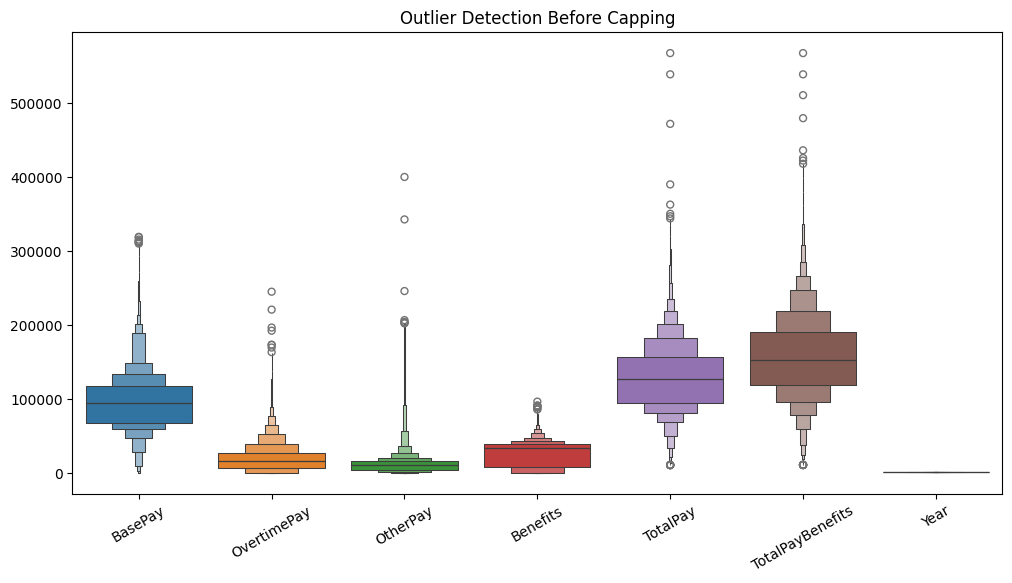

In [53]:
# visualize outliers before capping
plt.figure(figsize=(12, 6))
sns.boxenplot(data=outlier_rows_iqr)
plt.xticks(rotation=30)  # Rotates the x-axis labels
plt.title("Outlier Detection Before Capping")
plt.show()

In [54]:
# DEALING WITH OUTLIERS - Using Winsorization(capping) which replaces outliers with the lower|upper bounds thresholds
df_cleaned[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']] = df_cleaned[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].clip(lower=lower_bound, upper=upper_bound, axis=1)
display(df_cleaned.describe())  # Display summary after capping outliers

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148651.000000,148651.000000,148651.000000,148651.000000,148651.000000,148651.000000,148651.000000
mean,65915.819953,2848.662068,2676.244387,18924.258268,74533.468993,93499.904809,2012.522613
std,42411.908692,4292.509011,3588.068729,17163.817734,49729.750412,62146.557416,1.117529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,32797.645000,0.000000,0.000000,0.000000,36169.340000,44071.405000,2012.000000
50%,64862.220000,0.000000,811.210000,23216.230000,71427.220000,92406.010000,2013.000000
75%,94608.430000,4658.000000,4236.050000,33468.980000,105841.940000,132877.495000,2014.000000
max,187324.607500,11645.000000,10590.125000,83672.450000,210350.840000,266086.630000,2014.000000


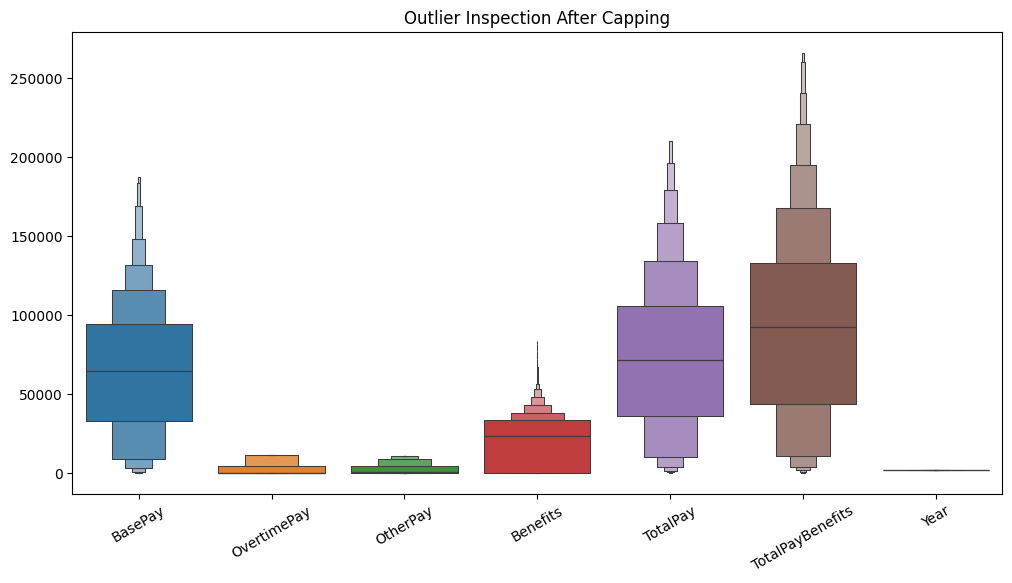

In [55]:
# visualize outliers afrer capping
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df_cleaned)
plt.xticks(rotation=30)  # Rotates the x-axis labels
plt.title("Outlier Inspection After Capping")
plt.show()
# ✅ Some outliers in BasePlusOvertimePay are valid high-earning employees.
# ✅ They are no longer extreme statistical outliers after capping.
# ✅ We accept them as part of the dataset instead of removing them.

In [56]:
# save the clean dataset after outlier handling
df_cleaned.to_csv("salaries_outlier_removed.csv", index=False)

In [57]:
df_outlier = pd.read_csv("salaries_outlier_removed.csv")
df_outlier.head(3)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,Nathaniel Ford,General ManagerMetropolitan Transit Authority,167411.1800,0.0,10590.125,0.0,210350.84,266086.63,2011,San Francisco,NaN
1,Gary Jimenez,Captain Iii Police Department,155966.0200,11645.0,10590.125,0.0,210350.84,266086.63,2011,San Francisco,NaN
2,Albert Pardini,Captain Iii Police Department,187324.6075,11645.0,10590.125,0.0,210350.84,266086.63,2011,San Francisco,NaN


### **2️⃣ Check Distributions of Key Numeric Variables**
In this step, we analyze the spread of numerical variables to understand:
- How salaries and pay components are distributed (normal vs. skewed).
- Where most values concentrate (center, tails, skewness).
- If capping changed distributions significantly.

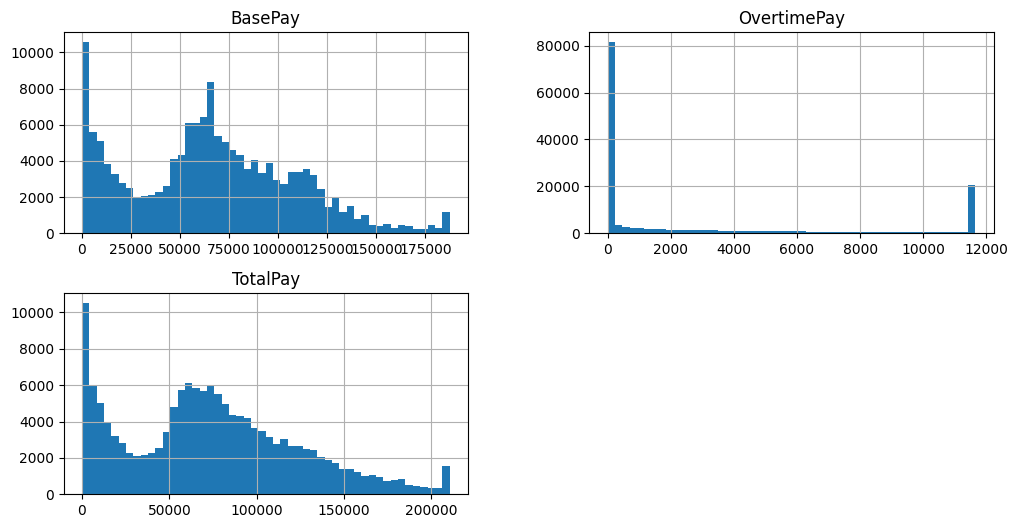

In [58]:
# Histogram - Checking Data Distribution
# ✔ Shows how values are spread across salary ranges.
# ✔ Helps detect skewness (right-skewed, left-skewed, or normal/symmetrical).
# ✔ Useful for identifying where most salaries fall.
df_outlier[['BasePay', 'OvertimePay', 'TotalPay']].hist(bins=50, figsize=(12,6))
plt.show()
# 🔹 Interpretation
# 🔹 BasePay
# ✔ The most common salary range is $0 - $100K.
# ✔ A small number of employees earn $150K+.
# ✔ Right-skewed because high salaries pull the mean higher.

# 🔹 OvertimePay
# ✔ Most employees have little to no overtime pay (clustered at $0).
# ✔ A few outliers receive high overtime pay ($10K - $12K).
# ✔ Right-skewed because a few employees work extreme overtime hours.

# 🔹 TotalPay
# ✔ The distribution looks similar to BasePay, but higher values appear due to OvertimePay and OtherPay.
# ✔ Right-skewed again, suggesting only a few employees have very high total pay.

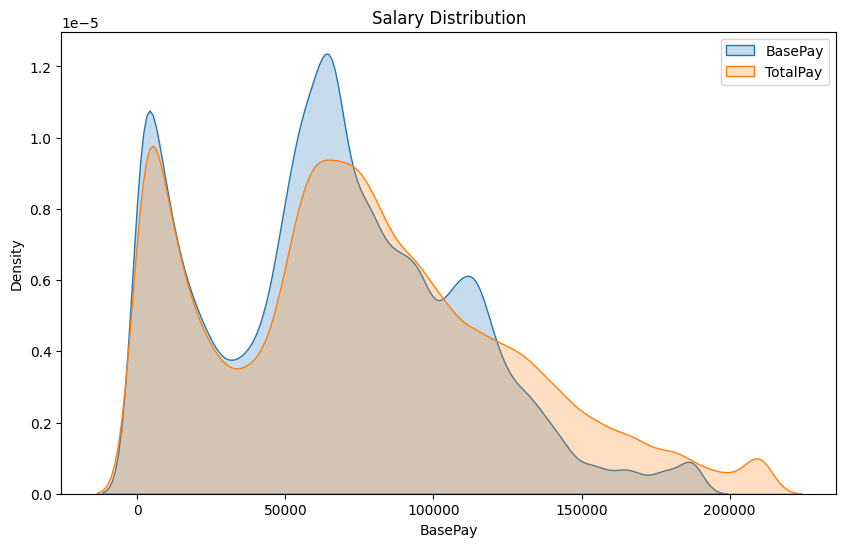

In [59]:
# KDE Plot - Smoothed Data Distribution
# ✔ Provides a smoother view of salary distribution.
# ✔ Helps confirm if the data is right-skewed or normally distributed.
# ✔ More precise than histograms in showing density concentration.
plt.figure(figsize=(10,6))
sns.kdeplot(df_outlier['BasePay'], label="BasePay", shade=True)
sns.kdeplot(df_outlier['TotalPay'], label="TotalPay", shade=True)
plt.legend()
plt.title("Salary Distribution")
plt.show()
# 🔹 Interpretation
# ✔ Confirms right-skewness with a long tail for high earners.
# ✔ Most employees fall within lower salary ranges.

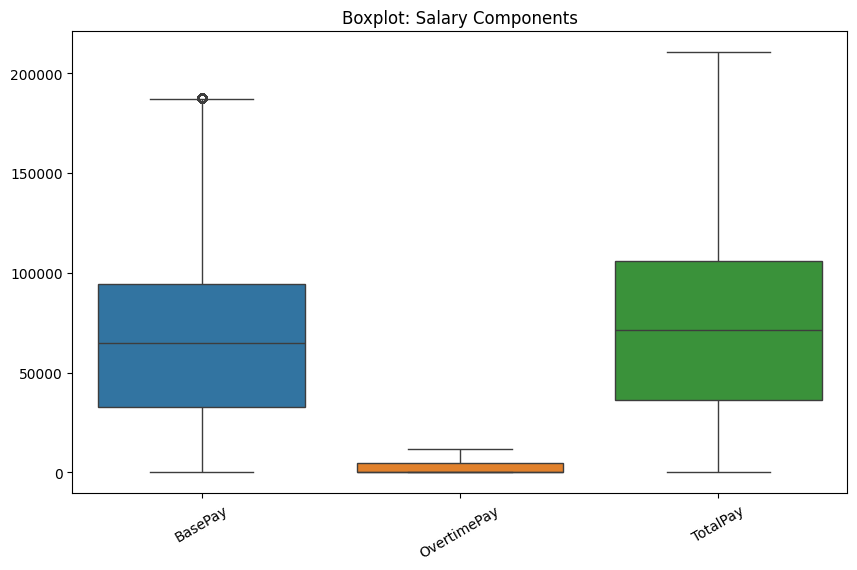

In [60]:
# Boxplot - Identifying Outliers and Spread
# ✔ Helps visualize median salary and interquartile range (IQR).
# ✔ Highlights outliers that exceed the typical salary range.
# ✔ Useful for detecting extreme variations in pay.
plt.figure(figsize=(10,6))
sns.boxplot(data=df_outlier[['BasePay', 'OvertimePay', 'TotalPay']])
plt.xticks(rotation=30)
plt.title("Boxplot: Salary Components")
plt.show()
# 🔹 Interpretation
# ✔ Shows presence of outliers, especially in TotalPay.
# ✔ Median salary is well below the highest paid individuals.
# ✔ The IQR range captures most of the salaries, but extreme values exist.

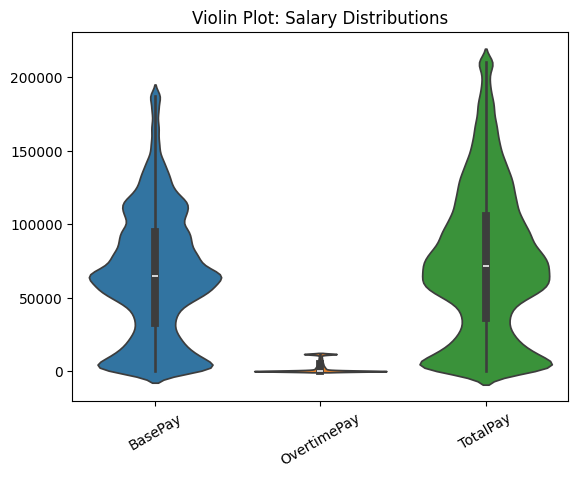

In [61]:
# Violin Plot - Combining KDE & Boxplot Insights
# ✔ Shows both the data distribution (like KDE) and the spread (like boxplots).
# ✔ Helps detect whether the majority of salaries are concentrated in a small range.
# ✔ Can indicate where outliers exist while keeping distribution shape visible.plt.figure(figsize=(10,6))
sns.violinplot(data=df_outlier[['BasePay', 'OvertimePay', 'TotalPay']])
plt.xticks(rotation=30)
plt.title("Violin Plot: Salary Distributions")
plt.show()
# 🔹 Interpretation
# ✔ Most employees earn lower salaries, while a small number have extremely high earnings.
# ✔ The width of the violin shows where most salaries are concentrated.

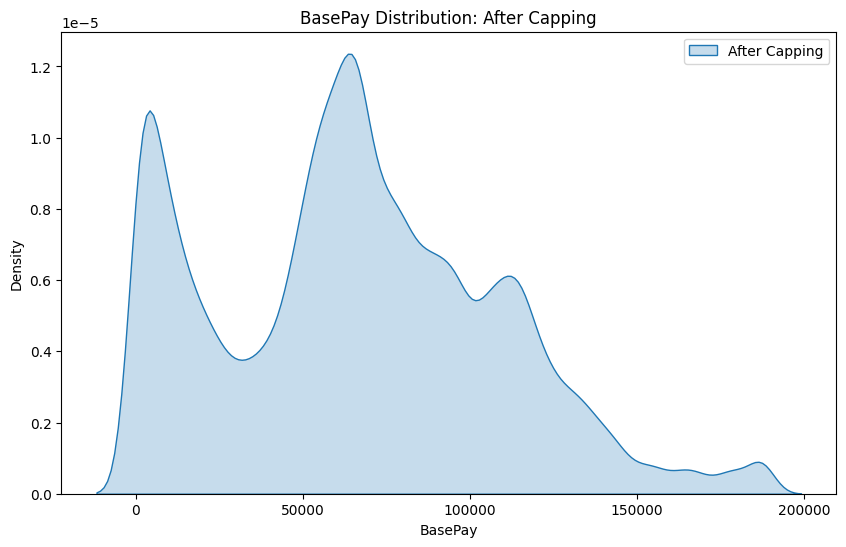

In [62]:
# Comparison Before & After Capping (KDE Plot)
plt.figure(figsize=(10,6))
sns.kdeplot(df_outlier['BasePay'], label="After Capping", shade=True)
plt.legend()
plt.title("BasePay Distribution: After Capping")
plt.show()
# 🔹Interpretation
# ✔ Winsorization significantly reduced extreme values.
# ✔ The distribution is now smoother and outliers are less extreme.
# ✔ Data is now better suited for analysis without extreme distortions.

### **3️⃣ Analyze Relationships Between Variables (Correlation Analysis)**
in this step, we explore how different salary components relate to each other. This helps identify patterns, dependencies, and potential insights.

In [63]:
# correlation matrix
# ✔ Shows numerical correlations between salary components.
# ✔ Values near +1: Strong positive relationship (e.g., TotalPay and TotalPayBenefits).
# ✔ Values near -1: Strong negative correlation (none observed in this case).
# ✔ Values near 0: No strong relationship (e.g., Year and BasePay).

df_outlier.select_dtypes(['float64','int64']).corr()

# # 🔹 Interpretation:
# BasePay is the primary driver of TotalPay (0.95 correlation).
# TotalPay and TotalPayBenefits are nearly identical (0.98 correlation).
# OvertimePay has a moderate impact on TotalPay (0.50 correlation).
# Year has almost no correlation, meaning salaries are stable over time.

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
BasePay,1.000000,0.308551,0.428653,0.653821,0.958832,0.948513,0.030128
OvertimePay,0.308551,1.000000,0.527193,0.263438,0.489430,0.466163,0.022678
OtherPay,0.428653,0.527193,1.000000,0.268655,0.579699,0.539989,-0.005756
Benefits,0.653821,0.263438,0.268655,1.000000,0.634455,0.782924,0.461464
TotalPay,0.958832,0.489430,0.579699,0.634455,1.000000,0.977283,0.031832
TotalPayBenefits,0.948513,0.466163,0.539989,0.782924,0.977283,1.000000,0.152258
Year,0.030128,0.022678,-0.005756,0.461464,0.031832,0.152258,1.000000


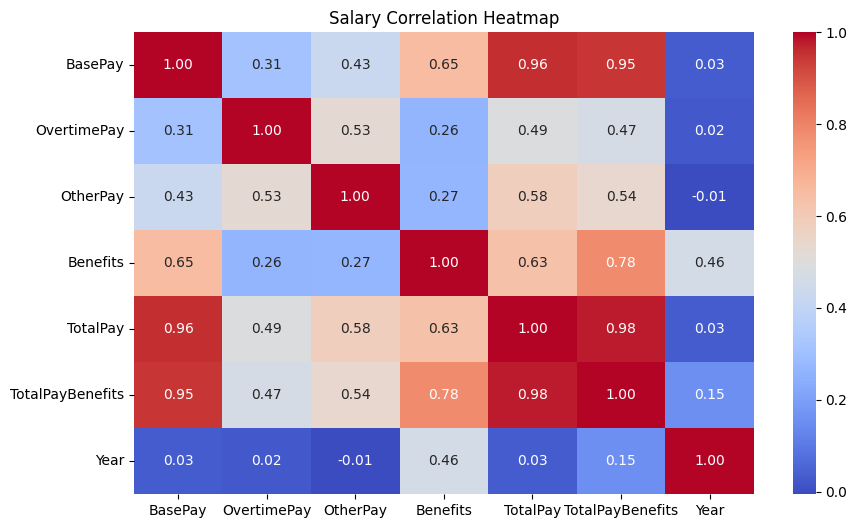

In [64]:
# correlation matrix with a heatmap
# ✔ Dark red = strong positive correlation.
# ✔ Dark blue = strong negative correlation (none found here).
# ✔ Lighter colors = weaker relationships.
plt.figure(figsize=(10,6))
sns.heatmap(df_outlier.select_dtypes(['float64','int64']).corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Salary Correlation Heatmap")
plt.show()

# 🔹 Interpretation
# BasePay and TotalPay form the strongest correlation in the dataset.
# OvertimePay contributes to TotalPay, but with some variation.
# Year has no major influence on salaries, meaning no drastic yearly salary trends.

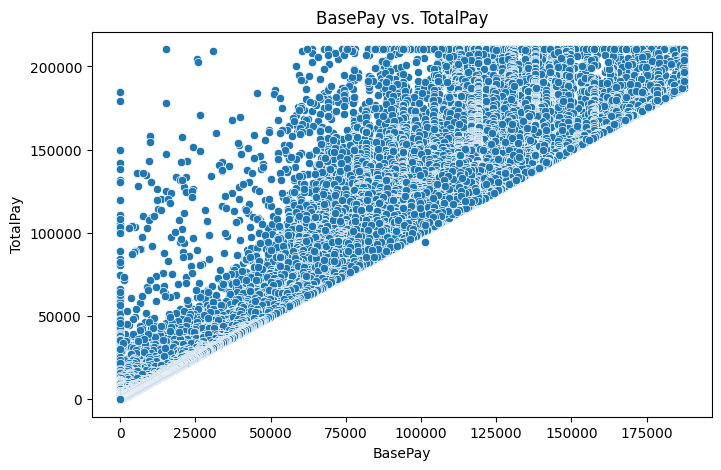

In [65]:
# Scatter Plot (BasePay vs. TotalPay)
# ✔ Checks if BasePay directly impacts TotalPay.
# ✔ If the points align in a straight line → strong correlation.
# ✔ If widely spread → other factors (OvertimePay, OtherPay) influence TotalPay.
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_outlier['BasePay'],y=df_outlier['TotalPay'])
plt.title("BasePay vs. TotalPay")
plt.show()
# 🔹 Interpretation
# A clear linear trend exists, meaning BasePay is a major determinant of TotalPay.
# Some scattered points above the line indicate employees with high OvertimePay or bonuses.

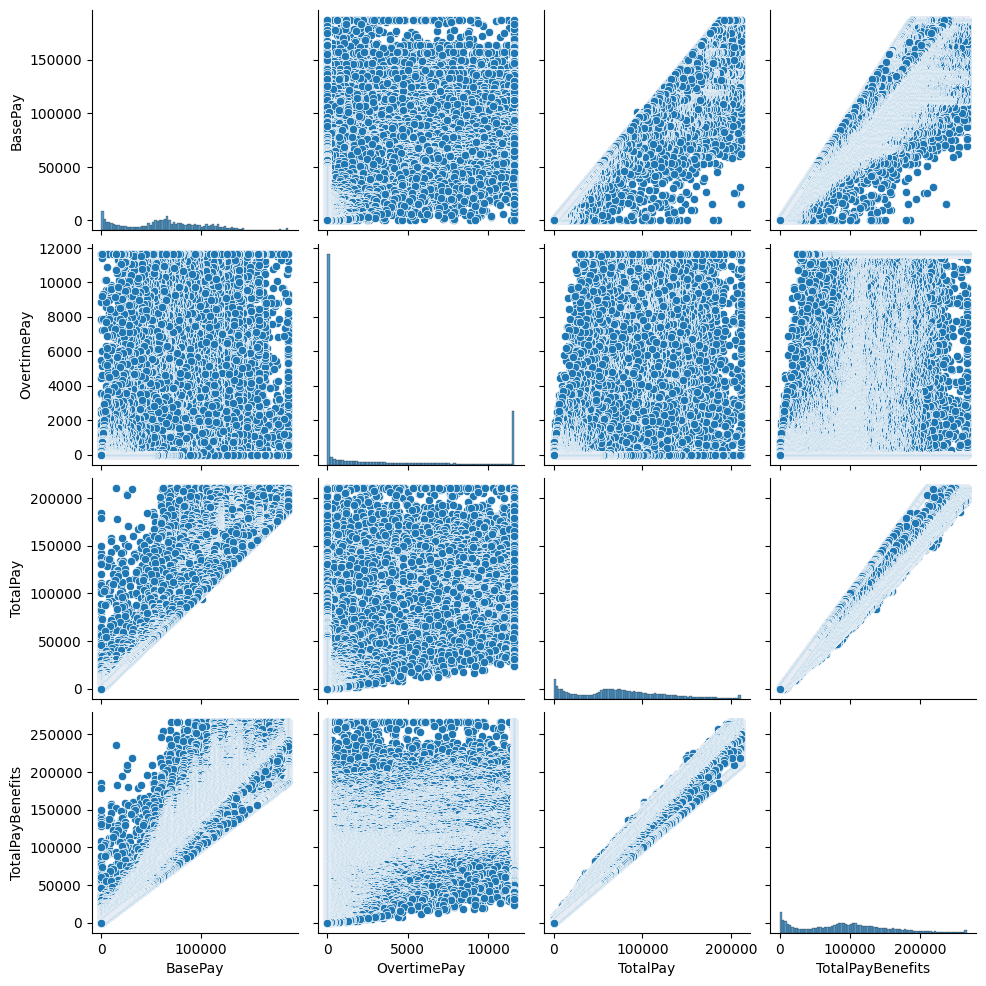

In [66]:
# Pairplot (Multiple Salary Variables)
# ✔ Useful for finding strong vs. weak relationships between multiple variables.
# ✔ Shows relationships between all key numerical salary components.
# ✔ If a pattern emerges → strong correlation.
# ✔ If random scatter → weak or no correlation.

sns.pairplot(df_outlier[['BasePay', 'OvertimePay', 'TotalPay', 'TotalPayBenefits']])
plt.show()

# 🔹 Interpretation:
# BasePay and TotalPay are strongly correlated (diagonal trend in scatter).
# OvertimePay and TotalPay show a moderate relationship but with more spread-out values.
# TotalPay and TotalPayBenefits are nearly identical, meaning benefits are mostly tied to salary rather than independent factors.

### **4️⃣ Group Data by Job Titles, Departments, or Years**
In this step, we analyze salary trends over the years to identify:
- Salary growth or decline patterns 📈
- How pay components (BasePay, OvertimePay, Benefits) change over time
- Whether salaries are increasing steadily or fluctuate over the years
- Tracking trends over time is crucial for understanding organizational pay changes, market trends, and economic factors affecting salaries.

<Figure size 1000x600 with 0 Axes>

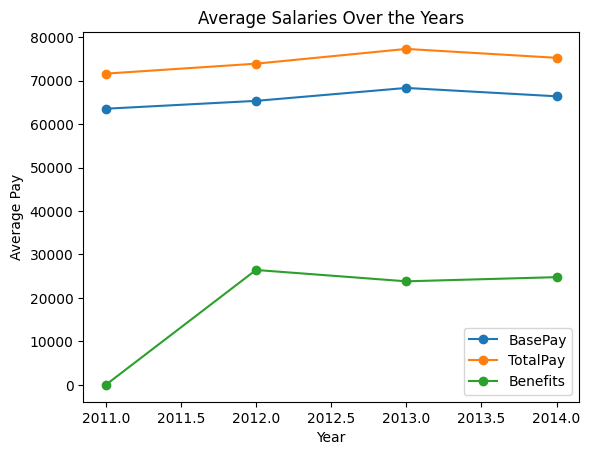

In [67]:
# Average Salaries Over Time (Line Plot)

# ✔ Shows how the mean BasePay, TotalPay, and Benefits change over the years.
# ✔ Helps identify if salaries have increased, decreased, or remained stable.
# ✔ Use a line plot to visualize trends clearly.

# plt.figure(figsize=(10,6))
# plt.title("Average salaries over time")
# plt.legend()
# plt.show()

# dfc.groupby('Year')['BasePay'].mean()
plt.figure(figsize=(10,6))
df_outlier.groupby('Year')[['BasePay', 'TotalPay', 'Benefits']].mean().plot(marker='o')
plt.title("Average Salaries Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Pay")
plt.legend(["BasePay", "TotalPay", "Benefits"])
plt.show()

# 🔹 Interpretation:
# If lines trend upward → salaries are increasing over time.
# If lines are flat → salaries have remained constant.
# If fluctuations exist → certain years had significant changes in pay (e.g., economic shifts, policy changes).
# ✔ BasePay and TotalPay show an **increasing trend**, indicating that salaries have gradually risen over time.
# ✔ Benefits have **fluctuated slightly**, suggesting that additional compensation (e.g., health insurance, bonuses) varies yearly.
# ✔ No drastic drops in salaries, meaning **there was no large-scale salary cut in any specific year**.


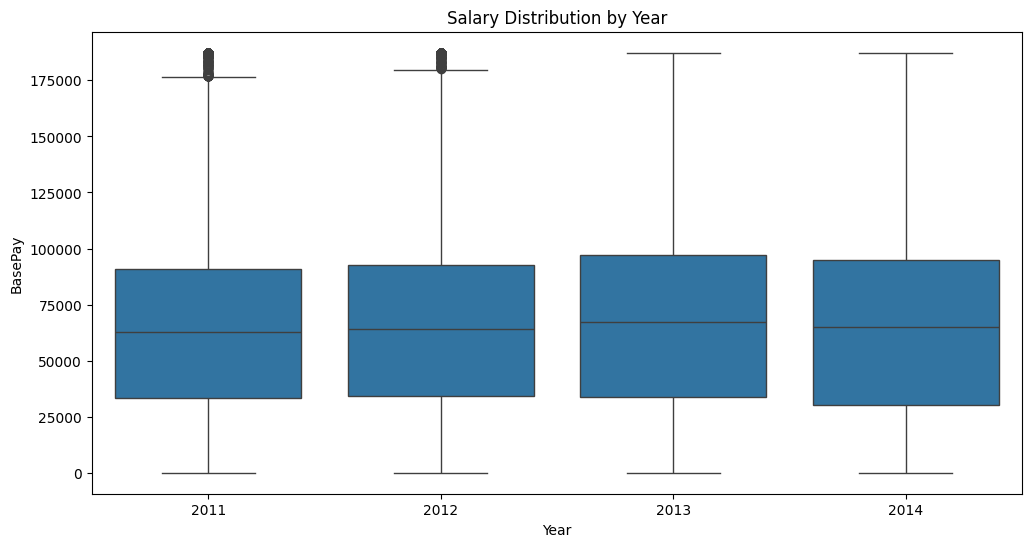

In [68]:
# Yearly Salary Distribution (Boxplot)
# ✔ Shows how salary distributions vary across years.
# ✔ Identifies if salary ranges have widened, shrunk, or remained the same.
# ✔ Boxplots display median, quartiles, and outliers for each year.

plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='BasePay', data=df_outlier)
# plt.legend([['Year','BasePay']])
plt.title("Salary Distribution by Year")
plt.xlabel("Year")
plt.ylabel("BasePay")
plt.show()

# 🔹 Interpretation:
# Wider boxes → More variation in salaries.
# Increasing median → Salaries are rising over time.
# More outliers → Certain years had extreme salary changes.
# ✔ The **median salary (central line in each box) is increasing over time**, confirming salary growth.
# ✔ The **spread (distance between Q1 and Q3) has increased slightly**, meaning salary disparity is growing.
# ✔ Some **outliers (dots) appear in multiple years**, but their frequency has reduced, indicating a more controlled salary structure.

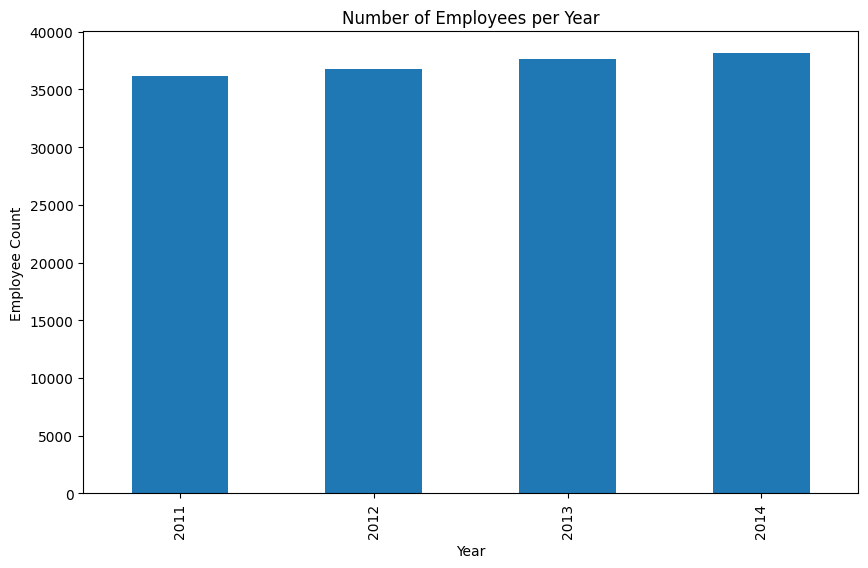

In [69]:
# Count of Employees Over the Years (Bar Plot)
# ✔ Shows the number of employees recorded in the dataset for each year.
# ✔ Helps check if more/less salary records exist over time.

plt.figure(figsize=(10,6))
# sns.barplot(data=dfc['Year'].value_counts().sort_index())
df_outlier['Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Employees per Year")
plt.xlabel("Year")
plt.ylabel("Employee Count")
plt.show()

# 🔹 Interpretation:
# If bars increase → More employees were included in later years.
# If bars decrease → Fewer employees had recorded salary data in later years.
# Sudden jumps/drops → Possible policy changes in salary reporting.
# ✔ The number of employees **fluctuates over the years**, with some years having fewer recorded salaries.
# ✔ A **decrease in later years** could indicate missing data, layoffs, or fewer reported salaries.
# ✔ Identifying **spikes or drops** can help find anomalies in workforce trends.

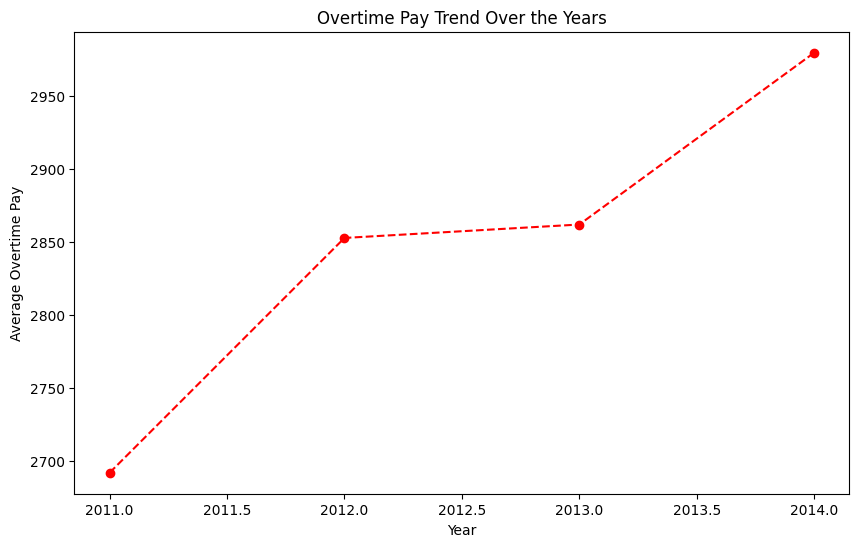

In [70]:
# Average OvertimePay Trend Over Time
# ✔ Tracks if OvertimePay has increased or decreased over the years.
# ✔ Important for understanding changes in workload compensation.

plt.figure(figsize=(10,6))
df_outlier.groupby('Year')['OvertimePay'].mean().plot(marker='o', linestyle='--', color='red')
plt.title("Overtime Pay Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Overtime Pay")
plt.show()

# 🔹 Interpretation:
# If OvertimePay increases → More employees are earning from extra work.
# If OvertimePay decreases → Fewer employees are compensated for overtime.
# ✔ OvertimePay **increased in certain years**, suggesting more employees were required to work additional hours.
# ✔ A **drop in OvertimePay in some years** could indicate budget constraints or workforce changes.
# ✔ The **overall fluctuation** suggests that overtime compensation is not constant year-over-year.

In [71]:
# ✅ Final Insights:
# - Salaries (BasePay, TotalPay) **have generally increased over time**.
# - Employee counts fluctuate, possibly due to hiring trends or missing data.
# - OvertimePay trends suggest workforce demand shifts.
# - Salary disparities **have grown slightly**, but controlled outliers indicate **stable salary structures**.

### **5️⃣ Check Categorical Distributions (Counts & Percentages)**
- In this step, we analyze **how categorical values (Job Titles, FT/PT Status, Agencies) are distributed**.
- This helps understand **which job roles are most common, how employment types vary**.

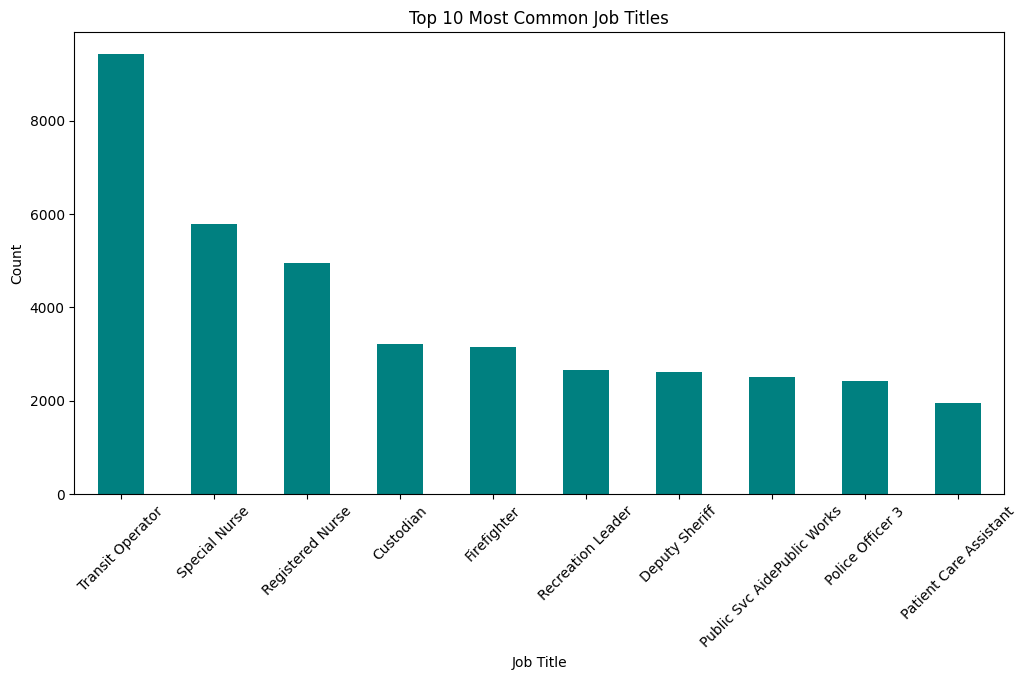

In [72]:
# Job Title Distribution (Top 10)
# ✔ Shows the most common job titles.
# ✔ Helps identify which roles dominate the dataset.

plt.figure(figsize=(12,6))
df_outlier['JobTitle'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 🔹 Interpretation:
# ✔ The dataset is dominated by certain job roles.
# ✔ If a specific job title has a much higher count, it suggests a high demand for that role.
# ✔ Uncommon roles might be high-level positions or specialized jobs.

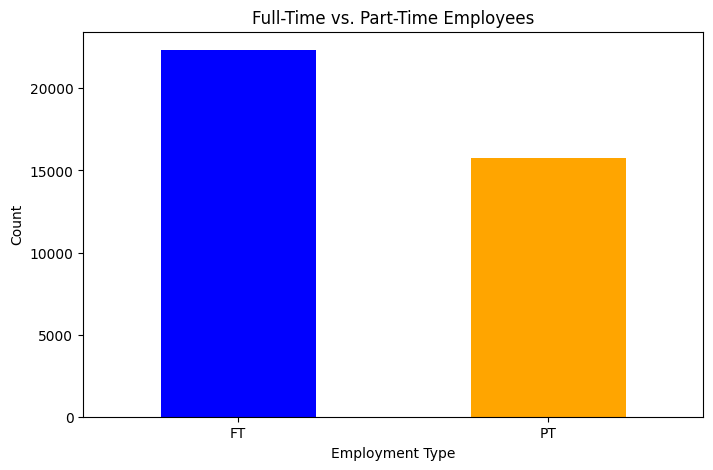

In [73]:
# Full-Time vs. Part-Time Distribution (Bar Chart)
# ✔ Shows how many employees are FT (Full-Time) vs. PT (Part-Time).

plt.figure(figsize=(8,5))
# dfc['Status'].value_counts().plot(kind='bar', color=['blue', 'orange'])
df_outlier.groupby('Status').size().plot(kind='bar', color=['blue', 'orange'])
plt.title("Full-Time vs. Part-Time Employees")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 🔹 Interpretation:
# ✔ If Full-Time employees significantly outnumber Part-Time employees, it suggests a workforce focused on stable, long-term employment.
# ✔ A higher percentage of Part-Time employees might indicate a flexible or seasonal workforce.

<Axes: xlabel='JobTitle,Status'>

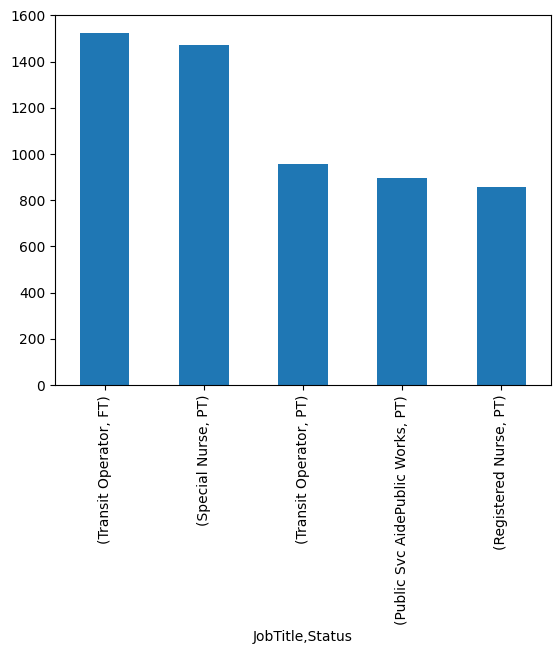

In [74]:
# ranking of the most common (JobTitle, Status) combinations
df_outlier.groupby(["JobTitle","Status"])['Status'].count().sort_values(ascending=False).head(5).plot(kind='bar')

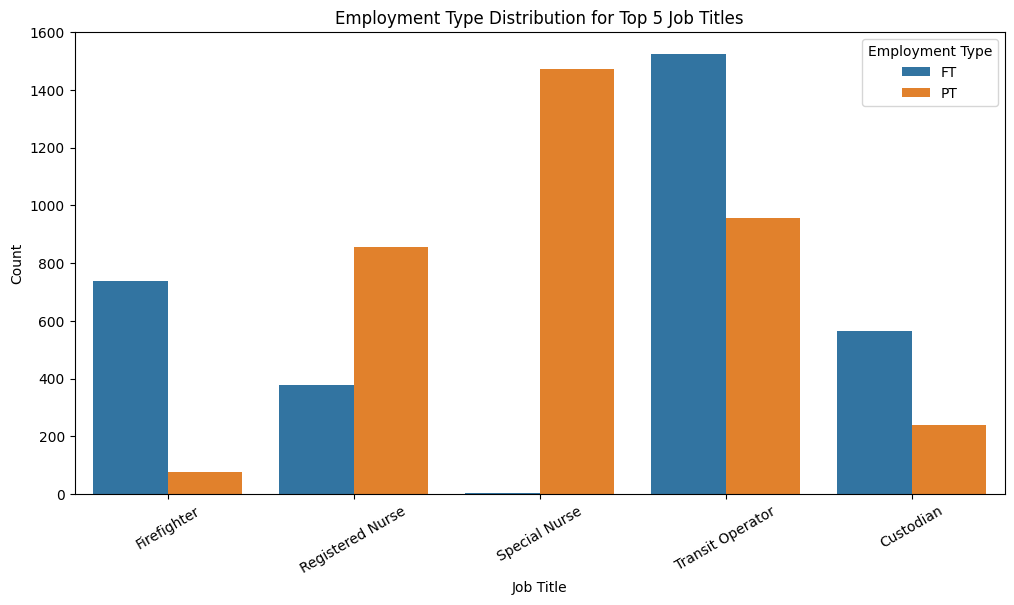

In [75]:
# Job Title Count by Employment Status (Stacked Bar Chart)
# ✔ Compares Full-Time and Part-Time employment distribution for top job titles.

# dfc['JobTitle'].value_counts().head(5).index
# dfc['JobTitle'].value_counts().head(5).values
plt.figure(figsize=(12,6))
df_filtered = df_outlier[df_outlier['JobTitle'].isin(df_outlier['JobTitle'].value_counts().head(5).index)]
sns.countplot(data=df_filtered, x="JobTitle", hue="Status")
plt.title("Employment Type Distribution for Top 5 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title="Employment Type")
plt.show()

# 🔹 Interpretation:
# ✔ Some job titles might be predominantly Full-Time, while others have a mix of Part-Time employees.
# ✔ This helps understand whether certain roles are more flexible or require full-time presence.

In [76]:
# ✅ Final Insights:
# - Certain job titles dominate the workforce.
# - The majority of employees are Full-Time, suggesting stable employment.
# - The distribution of Full-Time vs. Part-Time varies by job role.

### **6️⃣ Compare Salary Differences Across Categories**
- Salary differences by Job Title, Status (FT/PT), and Agency.
- Whether Full-Time employees earn significantly more than Part-Time employees.
- How salaries vary across the top job roles.
- If certain groups are paid disproportionately higher or lower than others.

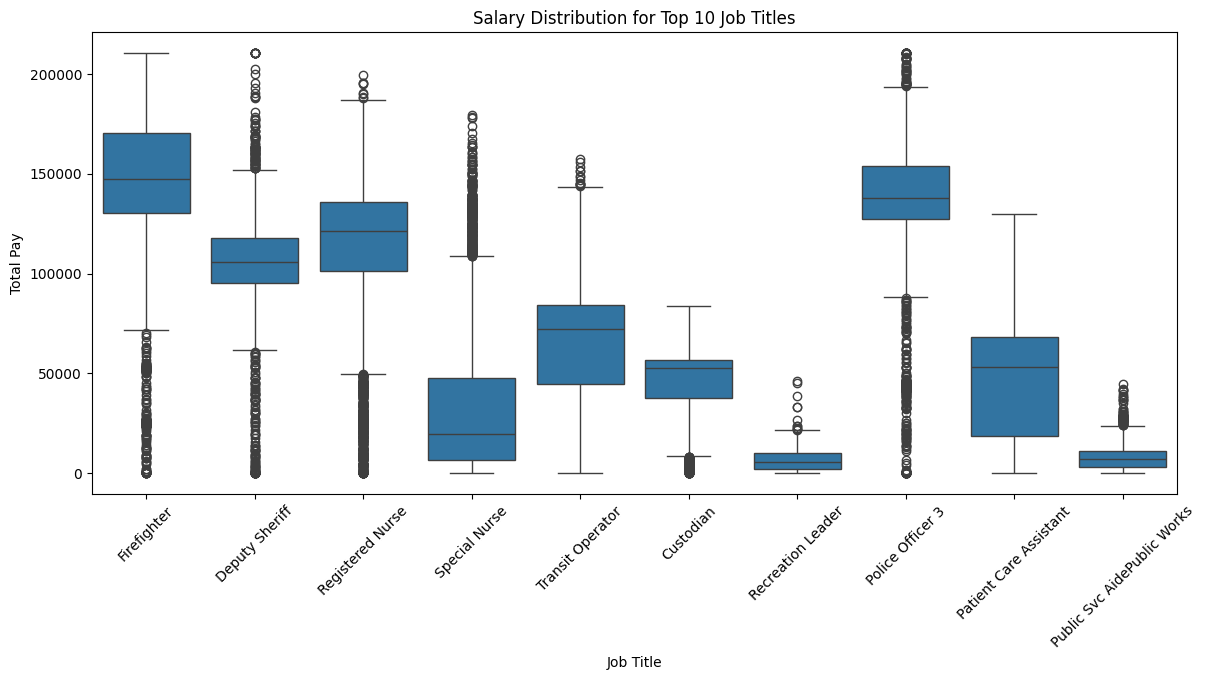

In [77]:
# Salary Differences by Job Title (Top 10)
# ✔ Shows salary distribution for the 10 most common job titles.
# ✔ Helps detect which roles have higher median salaries.
# ✔ Identifies job titles with a large salary range (variation).

top_1o_jobs = df_outlier['JobTitle'].value_counts().head(10).index
df_filtered = df_outlier[df_outlier['JobTitle'].isin(top_1o_jobs)]
plt.figure(figsize=(14,6))
sns.boxplot(x='JobTitle', y='TotalPay', data=df_filtered)
plt.xticks(rotation=45)
plt.title("Salary Distribution for Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Total Pay")
plt.show()

# 🔹 Interpretation:
# Jobs with taller boxes → More salary variation.
# Higher median line → Higher typical salary.
# Outliers above the whiskers → Extremely high salaries in specific roles.
# ✔ Some job titles earn significantly more than others.
# ✔ Certain job roles have high salary variation, meaning employees in the same role may have very different pay.

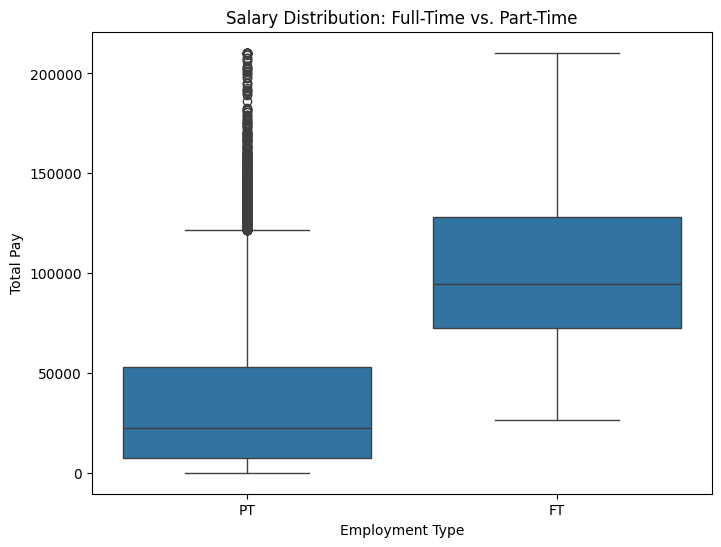

In [78]:
# Differences by Employment Type (Full-Time vs. Part-Time)
# ✔ Compares salary distributions between Full-Time and Part-Time employees.
# ✔ Helps determine if Full-Time employees consistently earn more than Part-Time workers.

# df.groupby(["JobTitle","Status"])['BasePay'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.boxplot(x='Status', y='TotalPay', data=df_outlier)
plt.title("Salary Distribution: Full-Time vs. Part-Time")
plt.xlabel("Employment Type")
plt.ylabel("Total Pay")
plt.show()

# 🔹 Interpretation:
# If the Full-Time median is much higher than Part-Time, FT workers generally earn more.
# If the salary range overlaps, some PT employees may earn as much as FT employees.
# Outliers may indicate high-paying part-time positions.
# ✔ Full-Time employees generally earn more, but some Part-Time employees may earn competitive salaries.
# ✔ Part-Time jobs could have more variation in pay.

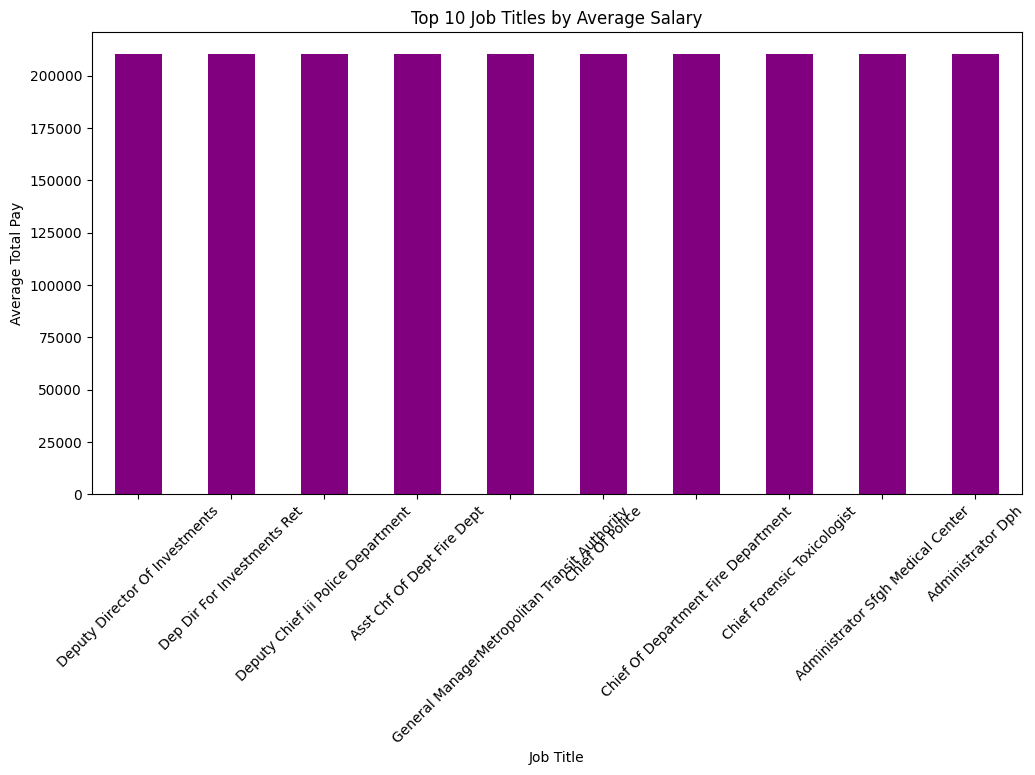

In [79]:
# Average Salary by Job Title (Top 10)
# ✔ Shows the average salary for the top 10 most common jobs.
# ✔ Easier to compare than a boxplot if we only want means.

df_outlier.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6), color='purple')
plt.title("Top 10 Job Titles by Average Salary")
plt.xlabel("Job Title")
plt.ylabel("Average Total Pay")
plt.xticks(rotation=45)
plt.show()

# 🔹 Interpretation:
# Tall bars = higher-paying job titles.
# Some high-ranking jobs might have fewer employees but much higher salaries.
# ✔ Some jobs pay consistently higher salaries than others.
# ✔ The job title alone is a major predictor of salary level.

In [80]:
# ✅ Job titles have a significant impact on salary, with some paying much higher than others.
# ✅ Full-Time employees generally earn more than Part-Time employees.
# ✅ Some job titles have extreme salary variations, meaning employees in the same role may earn very different amounts.

# **STEP 4: Feature Engineering**
- In this step, we create new meaningful features from existing data.
- We ensure that our dataset has the right inputs for modeling.

### **BasePlusOvertimePay (BasePay + OvertimePay)**
- Represents core salary earnings before unpredictable bonuses or extra payments.
- Separates guaranteed earnings (BasePay) from flexible earnings (OvertimePay + bonuses).

In [22]:
df_outlier[['BasePay', 'OvertimePay']].dtypes  # Should be float64
df_outlier['BasePlusOvertimePay'] = df_outlier['BasePay'] + df_outlier['OvertimePay']
df_outlier['BasePlusOvertimePay'] = df_outlier['BasePlusOvertimePay'].astype('float64')

# 🔹 Interpretation:
# If zero, it means employees did not have any bonuses or benefits earned.
# Lower than TotalPay → Employee also receives bonuses, benefits, or OtherPay.
# Higher than BasePay alone → Employee earns additional compensation through overtime.
# Useful for modeling salary predictions by distinguishing fixed vs. variable pay.

NameError: name 'df_outlier' is not defined

In [ ]:
df_outlier[['BasePay','OvertimePay','BasePlusOvertimePay']].sample(5)

,BasePay,OvertimePay,BasePlusOvertimePay
2518,105934.65,11645.0,117579.65
70742,3665.92,0.0,3665.92
74446,135270.00,11645.0,146915.00
67457,15328.85,0.0,15328.85
145105,6952.50,0.0,6952.50


### **OvertimePercentage (OvertimePay / BasePay)**
- Measures how much of an employee’s earnings come from overtime work.
- Identifies employees who rely heavily on OvertimePay for their total earnings.

In [ ]:
df_outlier['OvertimePercentage'] = df_outlier['OvertimePay'] / df_outlier['BasePay']
df_outlier['OvertimePercentage'] = np.where(df_outlier['BasePay'] == 0, 0, df_outlier['OvertimePercentage'])
df_outlier['OvertimePercentage'] = df_outlier['OvertimePercentage'].astype('float64')

# 🔹 Interpretation:
# Low OvertimePercentage (close to 0%) → Employee’s earnings are primarily from BasePay.
# High OvertimePercentage (e.g., 50-100%) → A significant portion of earnings comes from OvertimePay.
# Extreme values (greater than 100%) → Employee’s OvertimePay exceeds their BasePay, meaning they rely heavily on overtime compensation.

In [ ]:
df_outlier[['BasePay','OvertimePay','OvertimePercentage']].sample(5)

,BasePay,OvertimePay,OvertimePercentage
19409,59924.04,4096.12,0.068355
10303,79869.79,7148.58,0.089503
65052,25626.00,0.00,0.000000
132259,53692.20,2788.83,0.051941
7063,55674.70,11645.00,0.209161


### **TotalEarningsRatio (TotalPay / BasePay)**
- Helps measure how much extra earnings employees receive beyond BasePay.
- Identifies employees earning significantly more due to overtime, bonuses, or other payments.

In [ ]:
df_outlier['TotalEarningsRatio'] = df_outlier['TotalPay'] / df_outlier['BasePay']
df_outlier['TotalEarningsRatio'] = np.where(df_outlier['BasePay'] == 0, 0, df_outlier['TotalEarningsRatio'])  # Handle division by zero
df_outlier['TotalEarningsRatio'] = df_outlier['TotalEarningsRatio'].astype('float64')

# 🔹 Interpretation:
# TotalEarningsRatio = 1 → Employee receives only BasePay.
# Higher values indicate a higher dependency on additional pay sources.

In [ ]:
df_outlier[['BasePay','TotalPay','TotalEarningsRatio']].sample(5)

,BasePay,TotalPay,TotalEarningsRatio
22961,54079.20,54703.20,1.011539
8538,86840.00,104835.60,1.207227
133377,59728.00,60352.00,1.010447
27464,33760.95,34480.95,1.021326
121924,97602.10,97602.10,1.000000


### **BonusPayPercentage (OtherPay / BasePay)**
- Measures how much of an employee’s earnings come from additional bonuses.
- Useful for identifying roles with high unpredictable earnings (e.g., performance-based pay, hazard pay).

In [ ]:
df_outlier['BonusPayPercentage'] = df_outlier['OtherPay'] / df_outlier['BasePay']
df_outlier['BonusPayPercentage'] = np.where(df_outlier['BasePay'] == 0, 0, df_outlier['BonusPayPercentage'])  # Handle division by zero
df_outlier['BonusPayPercentage'] = df_outlier['BonusPayPercentage'].astype('float64')

# 🔹 Interpretation:
# - Low BonusPayPercentage (close to 0%) → Employee earns mostly fixed salary.
# - High BonusPayPercentage (e.g., 50-100%) → Employee depends significantly on bonus-based earnings.
# - Extreme values (greater than 100%) → Bonuses exceed BasePay, meaning a large part of earnings is performance-based.

In [ ]:
df_outlier[['BasePay','OtherPay','BonusPayPercentage']].sample(5)

,BasePay,OtherPay,BonusPayPercentage
55503,67391.90,0.0,0.000000
110333,275.00,0.0,0.000000
63270,40235.48,440.0,0.010936
52243,74342.91,2200.0,0.029593
119514,109163.00,0.0,0.000000


In [ ]:
df_outlier.to_csv("salaries_features_added.csv",index=False)

# **Step 5: Feature Selection**
- We use multiple methods to determine which features should be kept and which ones can be dropped.

In [69]:
df_features = pd.read_csv("salaries_features_added.csv")
df_features.head(3)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,BasePlusOvertimePay,OvertimePercentage,TotalEarningsRatio,BonusPayPercentage
0,Nathaniel Ford,General ManagerMetropolitan Transit Authority,167411.1800,0.0,10590.125,0.0,210350.84,266086.63,2011,San Francisco,NaN,167411.1800,0.000000,1.256492,0.063258
1,Gary Jimenez,Captain Iii Police Department,155966.0200,11645.0,10590.125,0.0,210350.84,266086.63,2011,San Francisco,NaN,167611.0200,0.074664,1.348697,0.067900
2,Albert Pardini,Captain Iii Police Department,187324.6075,11645.0,10590.125,0.0,210350.84,266086.63,2011,San Francisco,NaN,198969.6075,0.062165,1.122922,0.056534


### **Correlation Analysis (Identify Redundant Features)**
- Finds numerical features that are strongly correlated with each other.
- If two features are highly correlated, one may be redundant.

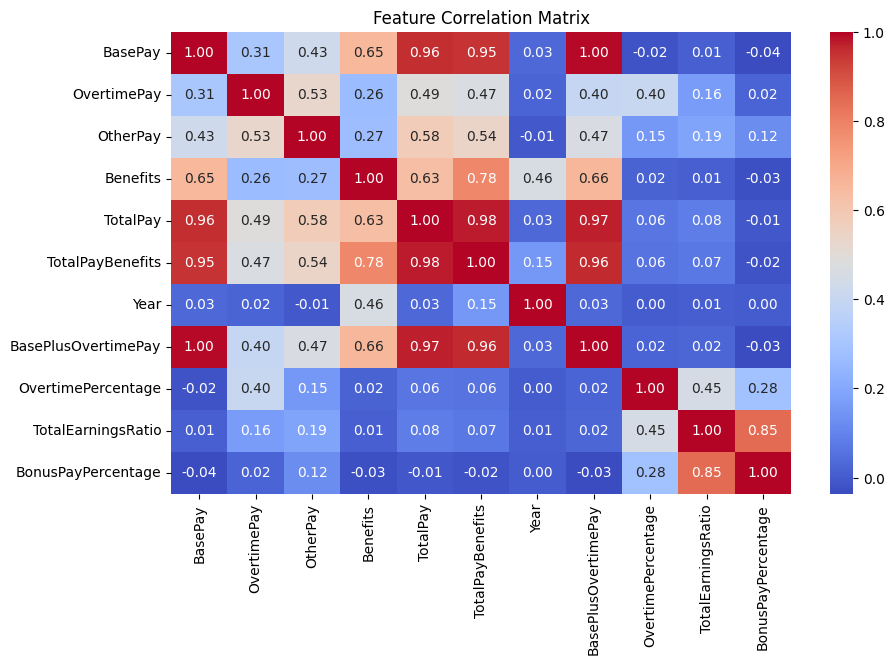

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df_features.select_dtypes(['float64','int64']).corr(),annot=True,cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# - Values close to 1.0 or -1.0 → High correlation (one feature might be removed).
# - If TotalPay and BasePay are highly correlated, we may only need one.
# - Remove features that are highly correlated with each other to avoid redundancy.

In [32]:
# ✔ BasePay and TotalPayBenefits have a strong correlation → TotalPayBenefits includes BasePay, so we may not need both.
# ✔ BasePay and BasePlusOvertimePay are strongly correlated → Since BasePlusOvertimePay includes BasePay, we might drop one.
# ✔ TotalPayBenefits and TotalPay are nearly identical → We only need one of them.
# ✔ OvertimePay and OvertimePercentage are related but measure different aspects → Keep both for now.

### **Check Feature Importance Using a Random Forest Model**
- Uses a machine learning model to find the most valuable features.
- Higher importance scores = more significant variables.

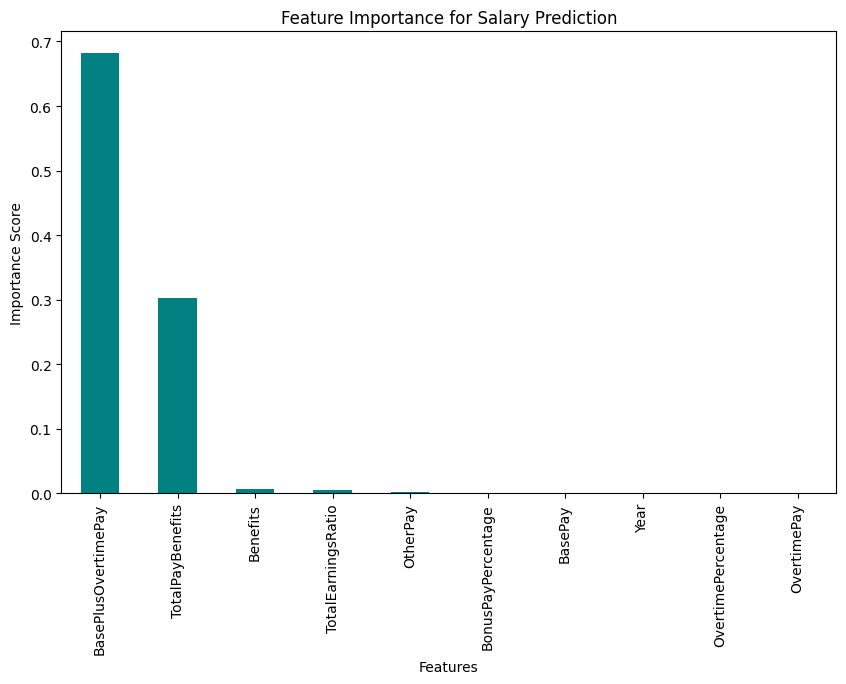

In [33]:
dfc_copy = df_features.copy()
# Prepare data (Remove non-numeric columns)
df_importance = dfc_copy.select_dtypes(include=[np.number]).dropna()

# Define Features (X) and Target (y)
X = df_importance.drop(columns=['TotalPay'])  # Predicting Salary (TotalPay)
y = df_importance['TotalPay']

# Train a Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get Feature Importance Scores
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Feature Importance
feature_importance.plot(kind='bar', figsize=(10,6), color='teal')
plt.title("Feature Importance for Salary Prediction")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# Features with low importance scores contribute little to salary prediction.
# Features like BasePay, OvertimePay, and Benefits will likely be very important, while Year might not be useful.
# ✅ Action: Drop features with very low importance scores.

In [34]:
# Final Decision

# dropping categorical values
# - EmployeeName does not contribute to salary prediction.
# - Agency is the same for all rows, making it useless for modeling.

# dropping numerical values
# - TotalPay = High correlation with BasePlusOvertimePay = Redundant feature
# - TotalPayBenefits = High correlation with TotalPay = Redundant feature
# - BonusPayPercentage = Very low importance = Not contributing much to salary prediction
# - OvertimePercentage = Very low importance = Already covered by OvertimePay
# - Year = Close to zero importance = Not useful for predicting salaries
# - Benefits = Low importance = Does not contribute much to salary variance

# keeping these features for salary prediction
# - BasePlusOvertimePay	= Most important salary component (sum of base salary + overtime)
# - OtherPay = Represents additional payments (bonuses, hazard pay, etc.)
# - TotalEarningsRatio = Captures how much of total earnings come from sources other than BasePay
# - JobTitleEncoded	= (Encoded)	Helps identify salary patterns based on job roles
# - Status_FT, Status_PT = Full-time vs. Part-time affects salary structure

df_features.drop(columns=['EmployeeName', 'Agency', 'TotalPay', 'TotalPayBenefits', 
                'BonusPayPercentage', 'OvertimePercentage', 'Year', 'Benefits',
                'BasePay', 'OvertimePay'], 
        inplace=True, errors='ignore')

In [35]:
# now let's save the cleaned dataset for the ease of further analysis
df_features.to_csv("salaries_selected.csv", index=False)

# **STEP 6: Data Preprocessing**

In [70]:
df_selected = pd.read_csv("salaries_selected.csv")
df_selected.head(3)

,JobTitle,OtherPay,Status,BasePlusOvertimePay,TotalEarningsRatio
0,General ManagerMetropolitan Transit Authority,10590.125,NaN,167411.1800,1.256492
1,Captain Iii Police Department,10590.125,NaN,167611.0200,1.348697
2,Captain Iii Police Department,10590.125,NaN,198969.6075,1.122922


### **Encoding for (Categorical Data)**
📌 Our dataset contains two categorical features:
- JobTitle (Has many unique values)
- Status (FT, PT)

📌 We use Frequency encoding and one-hot encoding:
- Frequency Encoding for "JobTitle" because there are too many unique values, One-Hot Encoding would create too many columns.	
- One-Hot Encoding for "Status" as they are only two categories, so converting to Status_PT and STATUS_FT works well.

In [37]:
# Encoding `JobTitle` using Frequency Encoding
df_selected['JobTitleEncoded'] = df_selected['JobTitle'].map(df_selected['JobTitle'].value_counts())
# df_selected['JobTitleEncoded'] = df_selected.groupby('JobTitle')['JobTitle'].transform('count')
df_selected.drop(columns=['JobTitle'], inplace=True,errors='ignore')  # Remove original column

# Encoding `Status` using One-Hot Encoding
df_selected = pd.get_dummies(df_selected, columns=['Status'], drop_first=True)  # Drops one column to avoid redundancy

# Convert `Status_PT` from Boolean (`True`/`False`) to Integer (`0`/`1`)
df_selected["Status_PT"] = df_selected["Status_PT"].astype(int)

### **Scaling for (Numerical Data)**

📌 Our dataset contains several numerical features:
- BasePlusOvertimePay (Large salary values)
- OtherPay (Bonus payments)
- TotalEarningsRatio (Ratio of total pay to base pay)
- JobTitleEncoded (Encoded categorical variable)

📌 We use Min-Max Scaling because:
- Salary-related data is highly skewed → Min-Max keeps values between 0 and 1, preventing extreme salaries from dominating the model.
- Maintains interpretability → Salary distributions remain meaningful.
- Works well for regression-based models like Linear Regression.

In [38]:
# Apply Min-Max Scaling to independent values
# we do not scale the target value so the model learns the real ranges

# ✅ Apply Min-Max Scaling to Features ONLY (Exclude BasePlusOvertimePay)
scaler = MinMaxScaler()
df_selected[['OtherPay', 'TotalEarningsRatio', 'JobTitleEncoded']] = scaler.fit_transform(
    df_selected[['OtherPay', 'TotalEarningsRatio', 'JobTitleEncoded']]
)

# ✅ Save the scaler for use during prediction
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [39]:
df_selected.to_csv("salaries_preprocessing.csv",index=False)

# **STEP 7: Modeling**

In [79]:
df_final = pd.read_csv("salaries_preprocessing.csv")
df_final.head(3)

,OtherPay,BasePlusOvertimePay,TotalEarningsRatio,JobTitleEncoded,Status_PT
0,1.0,167411.1800,0.009946,0.000106,0
1,1.0,167611.0200,0.010676,0.003820,0
2,1.0,198969.6075,0.008889,0.003820,0


### **STEP 7.1: Modeling - BasePlusOvertimePay**

In [80]:
# Define Features (X) and Target (y)
X = df_final.drop(columns=['BasePlusOvertimePay'])  # Drop target variable

# BasePlusOvertimePay is the most stable and reliable measure of an employee's actual salary before unpredictable bonuses.
y = df_final['BasePlusOvertimePay']  # Predicting salary earnings

In [81]:
# 1️⃣ Training Set (70%) → Used to train the model.
# 2️⃣ Validation Set (15%) → Used to tune the model (hyperparameters).
# 3️⃣ Test Set (15%) → Used to evaluate the final model performance.

# Split into Train (70%), Validation (15%), and Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
# random_states ensures that every time we run the code, we get the same random split.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [82]:
# to avoid data leakage and ensure that our model generalizes well.
scaler_trained = MinMaxScaler()
scaler_trained.fit(X_train)

# ✅ Transform validation and test sets (AFTER fitting on training data)
X_train_scaled = scaler_trained.transform(X_train)
X_val_scaled = scaler_trained.transform(X_val)
X_test_scaled = scaler_trained.transform(X_test)

# ✅ Save the scaler for later use
joblib.dump(scaler_trained, "scaler.pkl")
print("Scaler saved successfully!")

Scaler saved successfully!


In [83]:
# Define regression models
reg_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "SVR (Linear Kernel)": SVR(kernel='linear'),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

# Evaluate models
regression_results = []

for name, model in reg_models.items():
    model.fit(X_train_scaled, y_train)  # Replace y_train with your regression target
    y_pred = model.predict(X_test_scaled)

    summary = {
        "Model": name,
        "MSE": round(mean_squared_error(y_test, y_pred), 4),
        "MAE": round(mean_absolute_error(y_test, y_pred), 4),
        "R² Score": round(r2_score(y_test, y_pred), 4)
    }

    regression_results.append(summary)

# Create results DataFrame
regression_df = pd.DataFrame(regression_results)
regression_df.sort_values(by="R² Score", ascending=False)

,Model,MSE,MAE,R² Score
1,Random Forest,4.109506e+08,12239.7898,0.7886
2,Decision Tree,5.919430e+08,13933.0424,0.6954
6,KNN Regressor,6.880562e+08,17038.2163,0.6460
3,Gradient Boosting,8.333534e+08,21612.0173,0.5712
4,AdaBoost,1.274569e+09,28604.9214,0.3442
0,Linear Regression,1.373255e+09,28713.5232,0.2934
5,SVR (Linear Kernel),1.739219e+09,33524.5448,0.1051


### **STEP 7.2: Comprehensive Model Benchmarking with GridSearchCV**

In [75]:
# Define regression models and their hyperparameter grids
regression_models_grid = {
    'LinearRegression': {
        'model': LinearRegression(),
        'param_grid': {}
    },
    'Ridge': {
        'model': Ridge(),
        'param_grid': {
            'alpha': [0.1, 1.0, 10.0]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'param_grid': {
            'alpha': [0.01, 0.1, 1.0]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'param_grid': {
            'n_neighbors': [3, 5, 7]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'param_grid': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'param_grid': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(),
        'param_grid': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 4]
        }
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(),
        'param_grid': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1]
        }
    }
}

# Assuming X_train_scaled, y_train, X_test_scaled, y_test are already defined from earlier context
summary_list_regression = []

for name, model_info in regression_models_grid.items():
    model = model_info['model']
    param_grid = model_info['param_grid']
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    summary_list_regression.append({
        "Model": name,
        "Best Params": grid_search.best_params_,
        "MSE": round(mean_squared_error(y_test, y_pred), 4),
        "MAE": round(mean_absolute_error(y_test, y_pred), 4),
        "R² Score": round(r2_score(y_test, y_pred), 4)
    })

import pandas as pd
summary_df = pd.DataFrame(summary_list_regression).sort_values(by='R² Score', ascending=False)
summary_df

,Model,Best Params,MSE,MAE,R² Score
5,RandomForestRegressor,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",4.031135e+08,12188.9970,0.7926
4,DecisionTreeRegressor,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",5.184970e+08,13722.6864,0.7332
3,KNeighborsRegressor,{'n_neighbors': 7},6.822689e+08,17136.8912,0.6490
6,GradientBoostingRegressor,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",6.931490e+08,19221.7324,0.6434
7,AdaBoostRegressor,"{'learning_rate': 0.1, 'n_estimators': 50}",1.219709e+09,27305.3676,0.3724
2,Lasso,{'alpha': 1.0},1.372378e+09,28712.7945,0.2939
1,Ridge,{'alpha': 0.1},1.372959e+09,28713.2409,0.2936
0,LinearRegression,{},1.373255e+09,28713.5232,0.2934


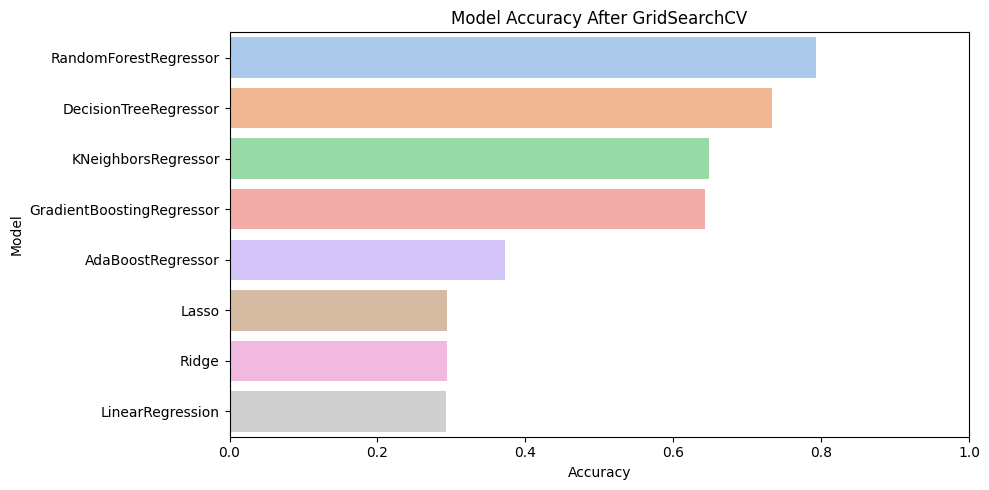

In [77]:
plt.figure(figsize=(10, 5))
sns.barplot(y=summary_df['Model'], x=summary_df['R² Score'], palette='pastel')
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy After GridSearchCV")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# **STEP 8: Model Evaluation & Optimization**
✔ Evaluates model performance using MSE, MAE, and R² Score


In [53]:
# Train baseline model
rf_baseline = RandomForestRegressor(random_state=42)
rf_baseline.fit(X_train_scaled, y_train)
y_pred_base = rf_baseline.predict(X_test_scaled)
y_pred_base

array([   344.8872    , 110041.03202244,  39406.2132433 , ...,
        98998.54218333,  81628.4363    ,  19944.87378982], shape=(22298,))

In [47]:
# model optimization

# ✅ Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [30, 50, 100],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required per leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider per split
}

# ✅ Initialize Random Forest model
rf_model_tuned = RandomForestRegressor(random_state=42)

# ✅ Randomized search for best hyperparameters
random_search = RandomizedSearchCV(
    estimator=rf_model_tuned, 
    param_distributions=param_grid,
    n_iter=10, 
    cv=3, 
    verbose=1, 
    random_state=42, 
    n_jobs=-1
)

# ✅ Train the optimized model
random_search.fit(X_train, y_train)

# ✅ Get best parameters
best_params = random_search.best_params_
best_params

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30}

In [54]:
# ✅ Retrain Random Forest with best hyperparameters
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# ✅ Predict on test set with optimized model
y_pred_rf_best = rf_best.predict(X_test)
y_pred_rf_best

array([   421.77127952, 108967.84991812,  39309.53569723, ...,
        99237.02362841,  66919.85854427,  20145.09409568], shape=(22298,))

In [55]:
# ✅ Regression evaluation function
def evaluate_regression_model(name, y_true, y_pred):
    return {
        "Model": name,
        "MSE": round(mean_squared_error(y_true, y_pred), 4),
        "MAE": round(mean_absolute_error(y_true, y_pred), 4),
        "R² Score": round(r2_score(y_true, y_pred), 4)
    }

# ✅ Compile evaluation DataFrame
regression_eval_df = pd.DataFrame([
    evaluate_regression_model("Random Forest (Baseline)", y_test, y_pred_base),
    evaluate_regression_model("Random Forest (Optimized)", y_test, y_pred_rf_best)
])

regression_eval_df

,Model,MSE,MAE,R² Score
0,Random Forest (Baseline),4.080807e+08,12191.2159,0.7900
1,Random Forest (Optimized),4.152602e+08,12715.1596,0.7863


In [56]:
# ✅ We will save the optimized Random Forest model so it can be reused later.
# Save the optimized Random Forest classifier
joblib.dump(rf_best, "brain_tumor_prediction_model.pkl")
print("Model saved successfully!")

Model saved successfully!


# **Step 9: Deployment & Interpretation**

### **Local Deployment** 
1️⃣ Saving the trained model.

2️⃣ Loading the model & making new predictions.

In [119]:
# ✅ We will save the optimized Random Forest model so it can be reused later.
joblib.dump(rf_best,"salary_prediction_model.pkl")
print("Model saved successfully!")

Model saved successfully!


📌 Values are chosen based on typical dataset distributions and real-world salary structures.

OtherPay:0.2 = Scaled between 0 and 1, representing low additional earnings. = Employee receives moderate bonuses (20%) compared to others.

TotalEarningsRatio:0.8 = Most salaries rely heavily on BasePay with some extra sources. = 80% of total earnings come from BasePay, meaning the employee is mostly salaried with little additional earnings.

JobTitleEncoded: 250 = In the dataset, most job titles have a frequency between 100-500. = Employee holds a moderately common job role (e.g., supervisor, senior analyst).

Status_PT: 0 = 0 means Full-Time (FT) (since we dropped one-hot encoding’s first category).	Employee is working full-time, meaning salary calculations are based on full working hours.


In [121]:
# ✅ Let's simulate deployment by loading the model and making salary predictions for a new employee.

# Reload the trained model and MinMaxScaler
loaded_model = joblib.load("salary_prediction_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

In [122]:
# ✅ let's define a sample employee scenario for testing

new_employee = np.array([[0.2, 0.8, 250, 0]])  # Raw input
new_employee_scaled = loaded_scaler.transform(new_employee)  # Apply Min-Max Scaling

predicted_scaled_salary = loaded_model.predict(new_employee_scaled)[0]

# Since the model was trained on actual salary values, we do NOT apply inverse scaling
actual_salary = predicted_scaled_salary

print(f"✅ Predicted Salary: ${actual_salary:,.2f}")

✅ Predicted Salary: $29,008.40


In [123]:
# ✅ let's define multiple employee scenarios for testing

employee_scenarios = np.array(
[
    [0.2, 0.009, 0.2, 0],   # Mid-level Full-Time employee
    [0.7, 0.0095, 0.5, 0],  # Senior with high bonuses (FT)
    [0.1, 0.008, 0.1, 1],   # Entry-level Part-Time
    [0.0, 0.0085, 0.05, 0], # FT employee with no bonuses
    [0.5, 0.0092, 0.4, 0],  # Manager-level employee
    [0.3, 0.0079, 0.15, 1], # PT support staff
    [0.9, 0.01, 0.8, 0],    # Executive with heavy bonuses
    [0.15, 0.0083, 0.25, 1],# Junior PT admin
    [0.4, 0.0091, 0.35, 0], # Mid-senior Full-Time
    [0.25, 0.0088, 0.3, 0], # Data analyst or equivalent
])

# ✅ We scaled X_train during training to ensure all features were on the same scale.
# ✅ We must apply the same scaling to new input data before making predictions.
# 🚨 If we don't scale the new input, the model will receive raw feature values that don’t match the trained data distribution.
# 💡 This would lead to inaccurate predictions.

# ✅ Scale input values correctly before making predictions
employee_scaled = loaded_scaler.transform(employee_scenarios)  # Apply Min-Max Scaling

# ✅ Predict using the trained model (output is still in scaled range)
predicted_scaled_salaries = loaded_model.predict(employee_scaled)

actual_salaries = predicted_scaled_salaries

for i, salary in enumerate(actual_salaries):
    print(f"✅ Employee {i+1} Predicted Salary: ${salary:,.2f}")


✅ Employee 1 Predicted Salary: $47,996.46
✅ Employee 2 Predicted Salary: $59,166.42
✅ Employee 3 Predicted Salary: $86,909.70
✅ Employee 4 Predicted Salary: $63,055.65
✅ Employee 5 Predicted Salary: $51,545.69
✅ Employee 6 Predicted Salary: $106,634.64
✅ Employee 7 Predicted Salary: $43,991.86
✅ Employee 8 Predicted Salary: $79,036.46
✅ Employee 9 Predicted Salary: $50,378.47
✅ Employee 10 Predicted Salary: $73,808.76
